## Tutorial on admixture mapping

This demo runs admixture mapping using the internal `snputils.tools.admixture_mapping` pipeline: MSP file and phenotype file in, regression results and a compressed TSV out.

In [4]:
import os
import sys
import logging

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

repo_dir = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("")), ".."))
if repo_dir not in sys.path:
    sys.path.insert(0, repo_dir)

from snputils.tools.admixture_mapping import run_admixture_mapping
from snputils.visualization.admixture_manhattan_plot import manhattan_plot

### 1. Define paths

Paths to the MSP file (local ancestry inference output), the phenotype file (whitespace-delimited, header with IID and one phenotype column), optional covariates, and the directory where results will be written.

In [5]:
msp_path = "data.msp"
phe_path = "pheno.phe"
covar_path = "covariates.covar"
results_dir = "out"
phe_id = "trait1"

### 2. Run admixture mapping

The internal tool streams the MSP file, aligns samples with the phenotype file, and runs logistic (binary) or linear (quantitative) regression per ancestry window. Trait type is inferred from the phenotype column. Results are written to a compressed TSV under `results_path` and returned as a DataFrame when `return_results=True`.

In [10]:
df_results = run_admixture_mapping(
    phe_path=phe_path,
    msp_path=msp_path,
    results_path=results_dir,
    phe_id=phe_id,
    batch_size=4096,
    keep_hla=True,
    return_results=True,
    quantitative=True,
    verbose=True,
    covar_path=covar_path,
    covar_variance_standardize=True,
)
df_results.head()

Reading MSP file...


  Chunk 0: 3000 windows (total so far: 3,000)
  Done. Processed 3,000 windows.
INFO:snputils.tools.admixture_mapping:Admixture mapping results written to out/trait1_admixmap.tsv.gz


,#CHROM,POS,END,ID,REF,ALT,A1,ANCESTRY,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE
0,1,1,1000,w1_ANC0,N,ANC0,ANC0,ANC0,LINEAR,800,-0.000478,0.035319,-0.013537,0.989202,.
1,1,1001,2000,w2_ANC0,N,ANC0,ANC0,ANC0,LINEAR,800,0.029272,0.035176,0.832174,0.405561,.
2,1,2001,3000,w3_ANC0,N,ANC0,ANC0,ANC0,LINEAR,800,0.029818,0.034677,0.859870,0.390121,.
3,1,3001,4000,w4_ANC0,N,ANC0,ANC0,ANC0,LINEAR,800,0.027226,0.034861,0.780986,0.435044,.
4,1,4001,5000,w5_ANC0,N,ANC0,ANC0,ANC0,LINEAR,800,0.027656,0.034745,0.795983,0.426280,.


Output is written to `{results_path}/{phe_id}_admixmap.tsv.gz` (or the path you passed if it already ends with `.tsv.gz`). The TSV contains columns `#CHROM`, `POS`, `P`, `ANCESTRY`, and others, suitable for plotting.

In [8]:
output_tsv = f"{results_dir}/{phe_id}_admixmap.tsv.gz"
output_tsv

'out/trait1_admixmap.tsv.gz'

### 3. Manhattan plot

Visualize association p-values from the internal admixture mapping output (TSV with `#CHROM`, `POS`, `P`). `pd.read_csv` supports gzipped TSV.

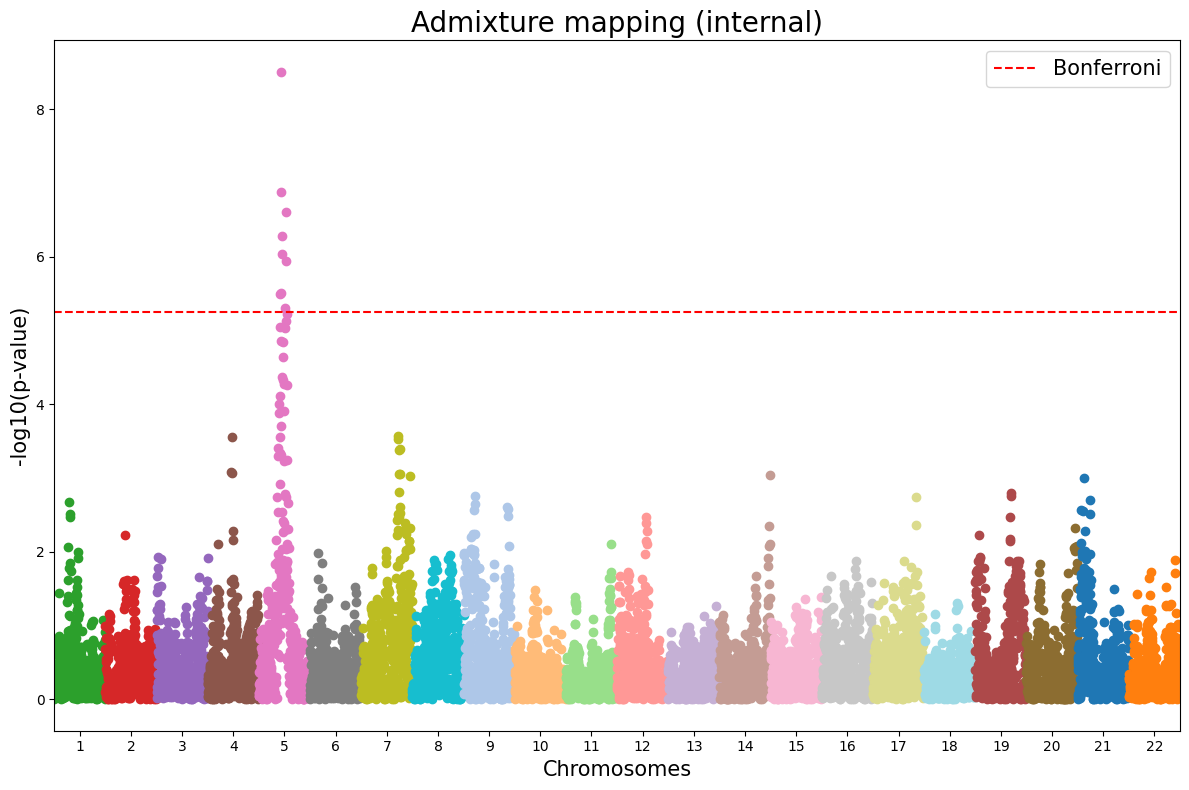

In [9]:
chromosome_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78",
    "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7",
    "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31",
]

manhattan_plot(
    input_file=output_tsv,
    colors=chromosome_colors,
    significance_threshold=0.05,
    figsize=(12, 8),
    title="Admixture mapping (internal)",
    fontsize={"title": 20, "xlabel": 15, "ylabel": 15, "legend": 15},
    save=True,
    output_filename=f"{results_dir}/manhattan_plot.png",
)
